Binaların Enerji Verimliği
DSPG Projesi Üzerinde Araştırılmıştır

Ulanbek Toktogulov
ulanbek.toktogulov@gmail.com


# Kütüphane Hazırlama

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Veri Yükleme

In [3]:
energy_df = pd.read_csv(r'ENB2012_data.csv')
energy_df.head() #veri basliklari gormek icin

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
# sutunlari isimlendirecegiz
energy_df.columns = ["relative_compactness","surface_area","wall_area","roof_area","overall_height","orientaion",
                   "glazing_area","glazing_area_dist","heating_load","cooling_load"]

In [5]:
energy_df.head(10) #ilk 10 satiri bakalim

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientaion,glazing_area,glazing_area_dist,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


# Veri Dönüştürme ve Bölme İşlemi

In [6]:
energy_df["log_heating_load"] = np.log(energy_df["heating_load"]) #isitma
energy_df["log_cooling_load"] = np.log(energy_df["cooling_load"]) #sogutma

energy_df_f = energy_df.copy() # verilerimizi kopyalayacagiz
energy_df_f.drop(["heating_load","cooling_load"], axis= 1, inplace = True) 

energy_X = energy_df_f.iloc[:,: -2]
energy_Y = energy_df_f.loc[:,["log_heating_load"]]

from sklearn.model_selection import RandomizedSearchCV as randomCV
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

std_scale=StandardScaler()

energy_X_std=std_scale.fit_transform(energy_X)

energy_train_X,energy_test_X,energy_train_Y,energy_test_Y=\
train_test_split(energy_X_std,energy_Y,test_size=0.20,random_state=48)

energy_train_r_X,energy_test_r_X,energy_train_Y,energy_test_Y=\
train_test_split(energy_X,energy_Y,test_size=0.20,random_state=48)

# PCA Regression

In [7]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression as l_reg
from sklearn.model_selection import cross_validate

In [8]:
def pca_regressor_cv(data_X,data_Y,no_features,seed,cv_no):
    pcr=make_pipeline(PCA(n_components=no_features,random_state=seed),l_reg())
    cv_results=cross_validate(pcr,data_X,data_Y,cv=cv_no,
                              scoring=["neg_root_mean_squared_error","r2"],return_train_score=True)
    return cv_results

In [9]:
rmse_list_train=[]
rmse_list_test=[]
r2_list_train=[]
r2_list_test=[]
for i in range(1,9):
    cv_results_temp=pca_regressor_cv(energy_train_X,energy_train_Y,no_features=i,seed=48,cv_no=5)
    mean_rmse_train=np.mean(cv_results_temp["train_neg_root_mean_squared_error"])
    mean_r2_train=np.mean(cv_results_temp["train_r2"])
    mean_rmse_test=np.mean(cv_results_temp["test_neg_root_mean_squared_error"])
    mean_r2_test=np.mean(cv_results_temp["test_r2"])
    rmse_list_train.append(mean_rmse_train)
    r2_list_train.append(mean_r2_train)
    rmse_list_test.append(mean_rmse_test)
    r2_list_test.append(mean_r2_test)
    rmse_df=pd.DataFrame(zip(rmse_list_train,rmse_list_test,r2_list_train,r2_list_test))
    rmse_df.columns=["Mean RMSE Train","Mean RMSE Test","Mean R2 Train","Mean R2 Test"]
    rmse_df.index=rmse_df.index+1

In [10]:
rmse_df

,Mean RMSE Train,Mean RMSE Test,Mean R2 Train,Mean R2 Test
1,-0.276333,-0.277533,0.664668,0.658539
2,-0.178222,-0.180507,0.857640,0.855037
3,-0.154762,-0.155155,0.894644,0.892932
4,-0.151661,-0.152948,0.898981,0.895856
5,-0.137665,-0.138499,0.916785,0.914670
6,-0.118800,-0.119947,0.938045,0.936239
7,-0.117298,-0.118518,0.939599,0.937711
8,-0.125294,-0.125159,0.930132,0.929335


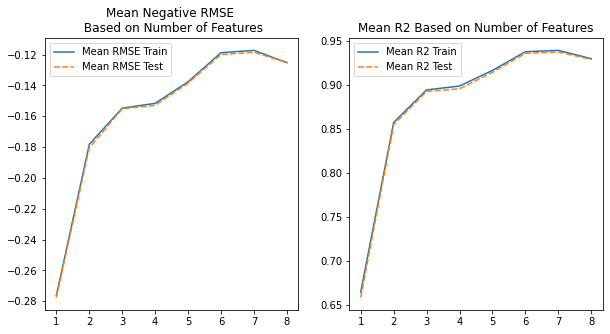

In [11]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.lineplot(data=rmse_df.iloc[:,:2],ax=ax[0])
sns.lineplot(data=rmse_df.iloc[:,2:],ax=ax[1])
ax[0].set_title("Mean Negative RMSE \n Based on Number of Features")
ax[1].set_title("Mean R2 Based on Number of Features")
plt.show()

In [12]:
pca=PCA(n_components=6,random_state=48)
energy_PCA_train_X=pd.DataFrame(pca.fit_transform(energy_train_X))
cum_variance=np.cumsum(pca.explained_variance_ratio_)
cum_variance_df=pd.DataFrame(zip(pca.explained_variance_ratio_,cum_variance))

In [13]:
cum_variance_df.columns=["Variance","Cumulative Variance"]
cum_variance_df.index=cum_variance_df.index+1
cum_variance_df


,Variance,Cumulative Variance
1,0.463862,0.463862
2,0.155927,0.619789
3,0.148402,0.768191
4,0.126390,0.894580
5,0.098502,0.993083
6,0.006363,0.999446


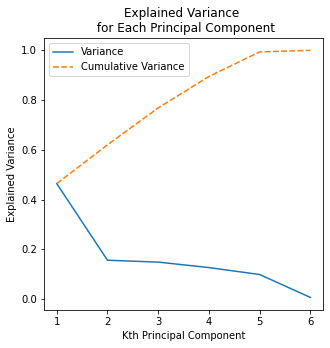

In [14]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
sns.lineplot(data=cum_variance_df,ax=ax)
ax.set_title(label="Explained Variance \n for Each Principal Component")
ax.set_xlabel(xlabel="Kth Principal Component")
ax.set_ylabel(ylabel="Explained Variance")
plt.show()

# Model Ayarlama

In [17]:
l_reg_pca=l_reg()
l_reg_pca.fit(energy_PCA_train_X,np.ravel(energy_train_Y))
pred_train_pca=l_reg_pca.predict(energy_PCA_train_X)
energy_PCA_test_X=pd.DataFrame(pca.transform(energy_test_X))
pred_test_pca=l_reg_pca.predict(energy_PCA_test_X)

In [18]:
from sklearn.metrics import mean_squared_error as MSE

In [19]:
print("RMSE for Train set:",MSE(pred_train_pca,energy_train_Y,squared=False))
print("RMSE for Test set:",MSE(pred_test_pca,energy_test_Y,squared=False))

RMSE for Train set: 0.11895516922251256
RMSE for Test set: 0.12885533678242034


In [21]:
from sklearn.metrics import r2_score

In [22]:
print("R2 for Train set:",r2_score(pred_train_pca,energy_train_Y))
print("R2 for Test set:",r2_score(pred_test_pca,energy_test_Y))

R2 for Train set: 0.9338166434343519
R2 for Test set: 0.9159809136173902


# Model Tani


In [23]:
actual_y_pca=[np.ravel(energy_train_Y),np.ravel(energy_test_Y)]
predict_y_pca=[pred_train_pca,pred_test_pca]

In [24]:
def residual_plot(actual_y,predict_y,title_label):
    fig,ax=plt.subplots(1,len(actual_y),figsize=(10,5))
    for i,col in enumerate(actual_y,0):
        sns.residplot(x=actual_y[i], y=predict_y[i], lowess=True, color="g",ax=ax[i])
        ax[i].set_title(title_label[i])
    return fig,ax

In [33]:
raw_pred_err_list_pca=[]

for i in range(0,len(actual_y_pca)):
    list_temp=[]
    list_temp=actual_y_pca[i]-predict_y_pca[i]
    raw_pred_err_list_pca.append(list_temp)
raw_pred_err_label=["Raw Prediction Errors (Train)","Raw Prediction Errors (Test)"]

In [34]:
def raw_predict_err_hist(err_predict_list,bin_no,title_label):
    fig,ax=plt.subplots(1,len(err_predict_list),figsize=(10,5))
    for i,col in enumerate(err_predict_list,0):
        sns.histplot(x=err_predict_list[i],bins=bin_no,kde=True,ax=ax[i])
        ax[i].set_title(title_label[i])
    return fig,ax

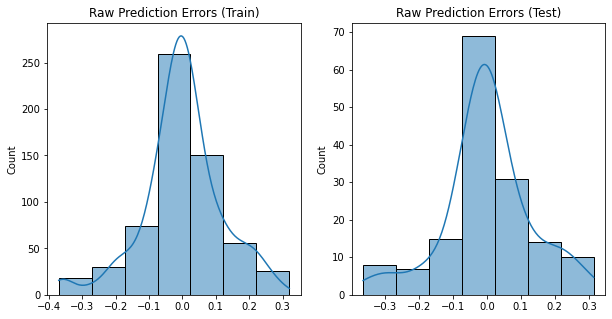

In [35]:
raw_predict_err_hist(raw_pred_err_list_pca,bin_no=7,title_label=raw_pred_err_label)
plt.show()


In [42]:
pls_rg_f=pls_reg(n_components=7)
pls_rg_f.fit(energy_train_r_X,np.ravel(energy_train_Y))
pred_train_pls=pls_rg_f.predict(energy_train_r_X)
pred_test_pls=pls_rg_f.predict(energy_test_r_X)

In [44]:
pca_components=pd.DataFrame(pca.components_.T)
pca_components.columns=pca_components.columns+1
pca_components.index=energy_X.columns
pca_components

,1,2,3,4,5,6
relative_compactness,0.495257,-0.214559,-0.113051,-0.024524,-0.016792,0.496696
surface_area,-0.501974,0.203405,0.106456,0.023227,0.017094,-0.066058
wall_area,0.032253,0.771500,0.443259,0.070424,0.062684,0.289731
roof_area,-0.505071,-0.174253,-0.110266,-0.011362,-0.013605,-0.204344
overall_height,0.496216,0.177967,0.108852,0.011761,0.009215,-0.789434
orientaion,0.009429,-0.084626,-0.010248,0.996250,-0.011421,0.000224
glazing_area,0.009032,0.389242,-0.583146,0.018808,-0.712723,0.004603
glazing_area_dist,0.014294,0.310920,-0.644389,0.027648,0.697941,-0.001310


In [45]:
dict(zip(["PC1","PC2","PC3","PC4","PC5","PC6"],np.exp(l_reg_pca.coef_)))

{'PC1': 1.2237502308192962,
 'PC2': 1.2296504746050319,
 'PC3': 0.9946251908162103,
 'PC4': 1.0149481631576247,
 'PC5': 0.9302710296073007,
 'PC6': 0.7343858026456898}

In [46]:
pls_x_loading=pd.DataFrame(pls_rg_f.x_loadings_)
pls_x_loading.columns=["CP1","CP2","CP3","CP4","CP5","CP6","CP7"]
pls_x_loading.index=energy_test_r_X.columns
pls_x_loading

,CP1,CP2,CP3,CP4,CP5,CP6,CP7
relative_compactness,0.479897,-0.364691,-0.065655,-0.406652,0.020483,-0.193601,0.496935
surface_area,-0.487191,0.354406,0.093269,0.101933,-0.033945,0.191765,0.195180
wall_area,0.122966,0.694042,0.361988,0.006992,-0.187442,0.759983,-0.285697
roof_area,-0.534163,0.012119,-0.082979,0.096039,0.056962,-0.178163,0.327602
overall_height,0.526647,-0.001525,0.005551,0.617171,-0.016928,0.187267,0.039840
orientaion,0.005334,-0.031420,-0.221267,-0.650988,0.865086,0.722646,-0.395434
glazing_area,0.069163,0.486561,-0.762146,-0.527989,0.187791,-0.944519,0.438689
glazing_area_dist,0.041814,0.192235,0.934596,0.244192,0.440535,-0.943176,0.419061


In [47]:
pls_rg_coef_f=dict(zip(pls_x_loading.columns,np.ravel(np.exp(pls_rg_f.coef_))))
pls_rg_coef_f

{'CP1': 1.0972234091811497,
 'CP2': 1.1074926619917096,
 'CP3': 1.0998358384772886,
 'CP4': 1.0553127481672062,
 'CP5': 1.5889404484041691,
 'CP6': 1.0000631119513945,
 'CP7': 1.1447580709168188}